In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import statsmodels.tsa.api as smt 
import statsmodels.api as sm 
import scipy.stats as scs
from arch import arch_model
%matplotlib inline

In [2]:
def transform_to_date(x):
    try:
        return datetime.strptime(str(x), "%m/%d/%Y")
    except Exception as e:
        print(e)

In [3]:
#日內波動(Garman,1980)
def inday_sigma(df):
    u = np.log(df.High/df.Open)
    d = np.log(df.Low/df.Open)
    c = np.log(df.Close/df.Open)
    sigma = 0.511*(u-d)*(u-d) - 0.019*(c*(u+d)-2*u*d) - 0.383*c*c
    return sigma

In [4]:
future = pd.read_csv('元大/future data/CA.csv')
future['Date'] = future['Date'].map(lambda x: transform_to_date(x))
future.set_index('Date' , inplace = True)
future['sigma'] = inday_sigma(future)
sigma = pd.DataFrame(future['sigma'])
sigma.tail()

,sigma
Date,
2020-07-01,0.000190
2020-07-02,0.000261
2020-07-03,0.000190
2020-07-06,0.000824
2020-07-07,0.000645


In [5]:
ret = 100 * future['Close'].pct_change().dropna()

In [6]:
def ts_plot(data, lags=None,title=''): 
    if not isinstance(data, pd.Series): 
        data = pd.Series(data) 
        #matplotlib官方提供了五種不同的圖形風格， 
        #包括bmh、ggplot、dark_background、 
        #fivethirtyeight和grayscale 
        with plt.style.context('ggplot'): 
            fig = plt.figure(figsize=(10, 8)) 
            layout = (3, 2) 
            ts_ax = plt.subplot2grid(layout, (0, 0)) 
            acf_ax = plt.subplot2grid(layout, (1, 0)) 
            pacf_ax = plt.subplot2grid(layout, (1, 1)) 
            qq_ax = plt.subplot2grid(layout, (2, 0)) 
            pp_ax = plt.subplot2grid(layout, (2, 1)) 
            data.plot(ax=ts_ax) 
            ts_ax.set_title(title+'時序圖') 
            smt.graphics.plot_acf(data, lags=lags, ax=acf_ax, alpha=0.5) 
            acf_ax.set_title('自相關係數') 
            smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.5) 
            pacf_ax.set_title('偏自相關係數') 
            sm.qqplot(data, line='s', ax=qq_ax) 
            qq_ax.set_title('QQ 圖') 
            scs.probplot(data, sparams=(data.mean(), data.std()), plot=pp_ax) 
            pp_ax.set_title('PP 圖') 
            plt.tight_layout() 
            return

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24207 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38364 missing from c

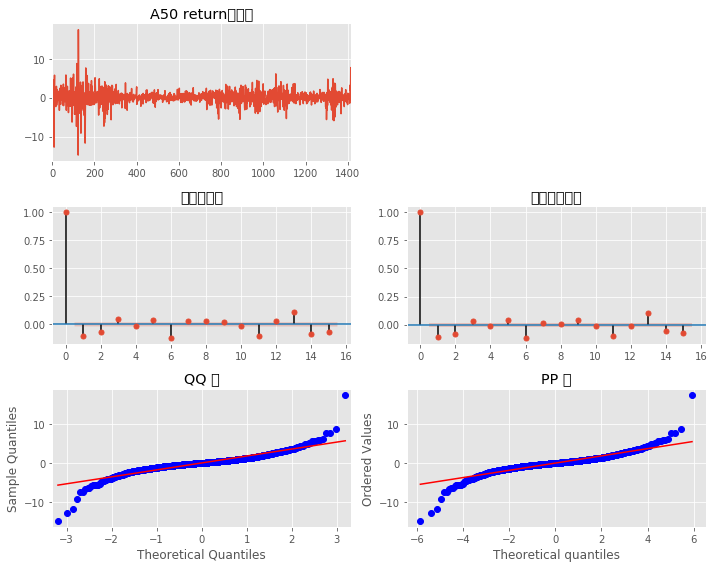

In [7]:
ts_plot(np.array(ret),lags=15,title='A50 return')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26041 missing from c

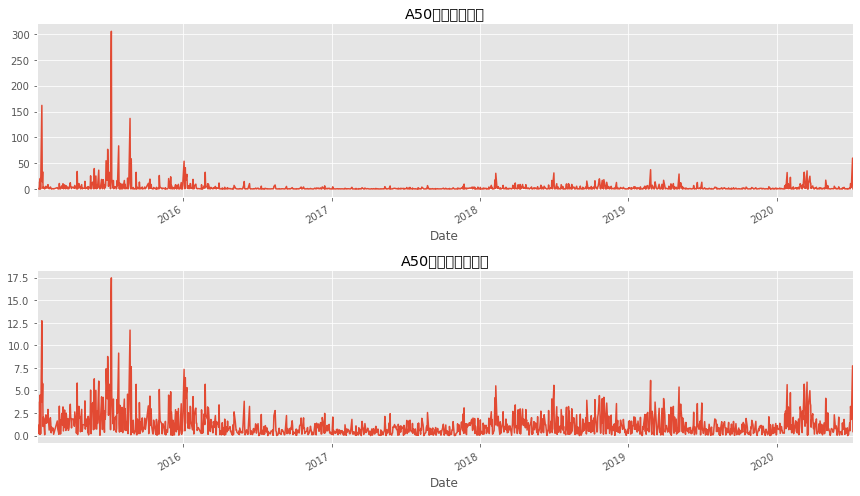

In [8]:
def ret_plot(ts, title=''): 
    ts1=ts**2 
    ts2=np.abs(ts) 
    with plt.style.context('ggplot'): 
        fig = plt.figure(figsize=(12, 7)) 
        layout = (2, 1) 
        ts1_ax = plt.subplot2grid(layout, (0, 0), colspan=2) 
        ts2_ax = plt.subplot2grid(layout, (1, 0)) 
        ts1.plot(ax=ts1_ax) 
        ts1_ax.set_title(title+'日收益率平方') 
        ts2.plot(ax=ts2_ax) 
        ts2_ax.set_title(title+'日收益率絕對值') 
        plt.tight_layout() 
        return 
ret_plot(ret.dropna(), title='A50')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32113 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35336 missing from cur

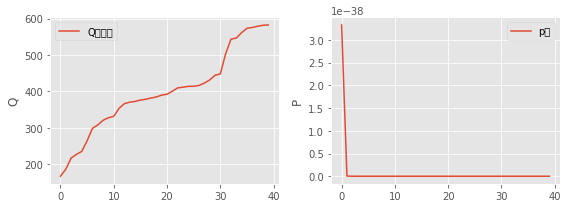

In [19]:
'''計算box pierce 和 box ljung統計量'''
def whitenoise_test(ts):  
    from statsmodels.stats.diagnostic import acorr_ljungbox 
    q,p=acorr_ljungbox(ts) 
    with plt.style.context('ggplot'): 
        fig = plt.figure(figsize=(8, 3)) 
        axes = fig.subplots(1,2) 
        axes[0].plot(q, label='Q統計量') 
        axes[0].set_ylabel('Q') 
        axes[1].plot(p, label='p值') 
        axes[1].set_ylabel('P') 
        axes[0].legend() 
        axes[1].legend() 
        plt.tight_layout() 
        return 
whitenoise_test(ret**2)

In [10]:
am = arch_model(ret ,p=1 , q=1 , vol = 'EGARCH' , dist='t') 
#fat-tail is better
res = am.fit(update_freq = 0)
print(res.summary)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2433.392562696143
            Iterations: 16
            Function evaluations: 130
            Gradient evaluations: 16
<bound method ARCHModelResult.summary of                         Constant Mean - EGARCH Model Results                        
Dep. Variable:                        Close   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2433.39
Distribution:      Standardized Student's t   AIC:                           4876.79
Method:                  Maximum Likelihood   BIC:                           4903.06
                                              No. Observations:                 1416
Date:                      Wed, Jul 29 2020   Df Residuals:                     1411
Time:                              16:57:05   Df Model:             

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27544 missing from c

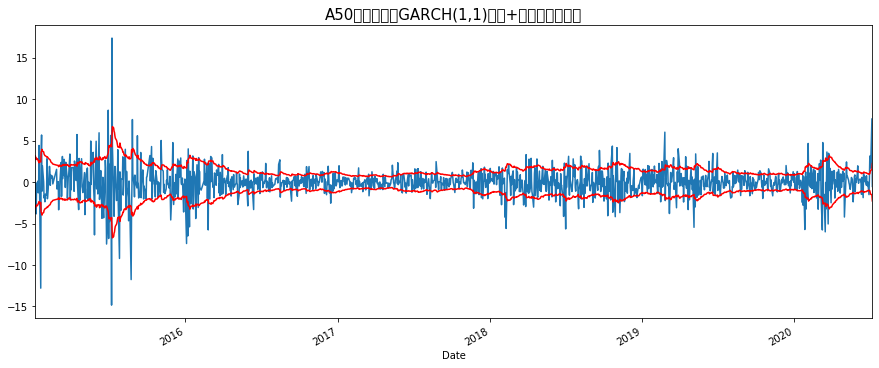

In [11]:
res.conditional_volatility2 = res.conditional_volatility * -1
plt.figure(figsize=(15,6))
res.resid.plot() 
plt.title('A50收益率擬合GARCH(1,1)殘差+收益率條件方差',size=15) 
#plt.show() 
res.conditional_volatility.plot(color='r') 
res.conditional_volatility2.plot(color='r') 
#plt.title('A50收益率條件方差',size=15) 
plt.show()

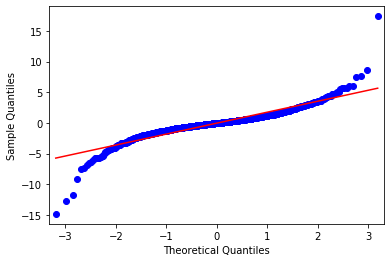

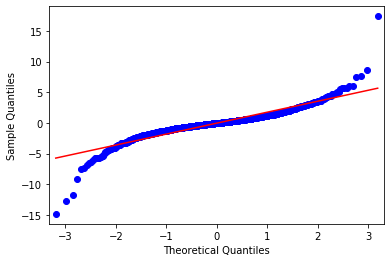

In [12]:
sm.qqplot(res.resid, line='s') 

加上GoogleTrends變數

In [13]:
A50 = pd.read_csv('元大/GT_daily/A50指數_daily.csv' ,index_col='date')
A50.drop(['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'] , axis = 1 ,inplace = True)
A50['cross mean'] = A50.mean(axis = 1)
A50['cross mean']

date
2015-01-01     7.5
2015-01-02    16.8
2015-01-03     0.0
2015-01-04     0.0
2015-01-05     4.4
              ... 
2020-07-17    32.5
2020-07-18     6.1
2020-07-19     5.2
2020-07-20    47.4
2020-07-21    26.8
Name: cross mean, Length: 2029, dtype: float64

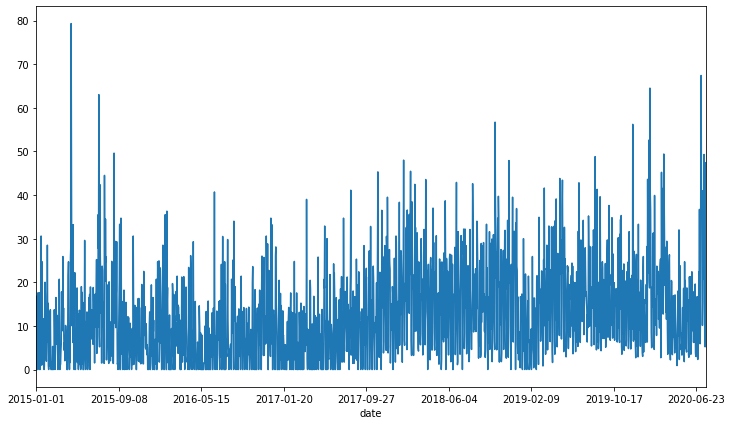

In [14]:
plt.figure(figsize=(12,7))
A50['cross mean'].plot()

In [15]:
data

NameError: name 'data' is not defined

               resid  cross mean
resid       1.000000   -0.077514
cross mean -0.077514    1.000000


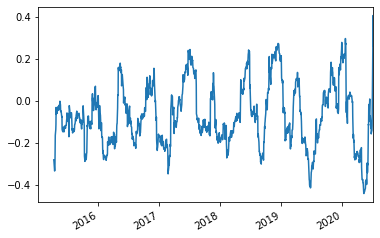

In [16]:
data = pd.concat([res.resid , A50['cross mean']] , axis = 1)
data.dropna(inplace = True)
print(data.corr())
corr = data['resid'].rolling(window = 60).corr(data['cross mean'] , pairwise = True)
corr.plot()

In [288]:
res.resid.corr(A50['cross mean'])

-0.07751395496913073

改用R加上external regressors